# Visualization of detected peak of CO2

In [1]:
%matplotlib inline

In [2]:
#!conda install geopandas
#!pip install geopandas pandas_bokeh

In [30]:
import os
import glob
import numpy as np
import pandas as pd
# Import geopandas package
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import figure
from tqdm import tqdm_notebook as tqdm
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry

input_dir = r'../../../datasets/OCO2/csv/'
input_dir = r'http://courty.fr/OCO2/'
#input_dir = r'../pipeline/'
# peak_dataoco2_1808-o21714-i37483

In [31]:
# dir = os.path.realpath(input_dir)
# print(dir)
# csv_list = glob.glob(input_dir + "result_"+"*.csv")
# # # Initialize array to store data
# df_res = pd.DataFrame()
# # Loop over the files
# for one_file in tqdm(csv_list):
#     #print('Reading', one_file)
#     df_temp = pd.read_csv(one_file, sep=",")
#     df_res = df_res.append(df_temp)
df_res = pd.read_csv(input_dir + "result_for_oco2_1808.csv", sep=",")


# creating a geometry column 
geometry = [Point(xy) for xy in zip(df_res['longitude'], df_res['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf_res = gpd.GeoDataFrame(df_res.copy(), crs=crs, geometry=geometry)



In [32]:
df_res.tail(3)

,Unnamed: 0,sounding_id,latitude,longitude,orbit,slope,intercept,amplitude,sigma,delta,R,windspeed_u,windspeed_v
2736,2736,2018083122432571,31.114796,-143.827850,22159,0.006210,403.550794,0.286084,14.724687,0.007751,0.542937,-4.404825,2.101457
2737,2737,2018083122433238,31.412222,-143.909012,22159,0.003365,403.564271,15.091141,22.844005,0.263548,0.506012,-4.287163,2.074741
2738,2738,2018083122433476,31.561739,-143.956909,22159,0.000956,403.523323,31.588597,29.640165,0.425167,0.520540,-4.228929,2.043472


In [6]:
gdf_res.tail(3)

,Unnamed: 0,sounding_id,latitude,longitude,orbit,slope,intercept,amplitude,sigma,delta,R,windspeed_u,windspeed_v,geometry
2736,2736,2018083122432571,31.114796,-143.827850,22159,0.006210,403.550794,0.286084,14.724687,0.007751,0.542937,-4.404825,2.101457,POINT (-143.8278503417969 31.11479568481445)
2737,2737,2018083122433238,31.412222,-143.909012,22159,0.003365,403.564271,15.091141,22.844005,0.263548,0.506012,-4.287163,2.074741,POINT (-143.9090118408203 31.41222190856934)
2738,2738,2018083122433476,31.561739,-143.956909,22159,0.000956,403.523323,31.588597,29.640165,0.425167,0.520540,-4.228929,2.043472,POINT (-143.9569091796875 31.56173896789551)


In [7]:
len(df_res)

2739

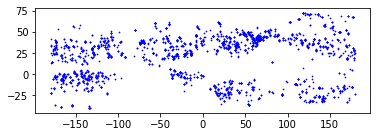

In [8]:
# Plot all points
gdf_res.plot(marker='o', color='b', markersize=0.5)

In [9]:
def draw_map_df(data, x="longitude", y="latitude", c="xco2", lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(15, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
    
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    normal = matplotlib.colors.LogNorm(vmin=data[c].min(), vmax=data[c].max())

    m.scatter(data[x], data[y], c=data[c], cmap=plt.cm.jet, s=size_point, norm=normal)

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

<Figure size 800x640 with 0 Axes>

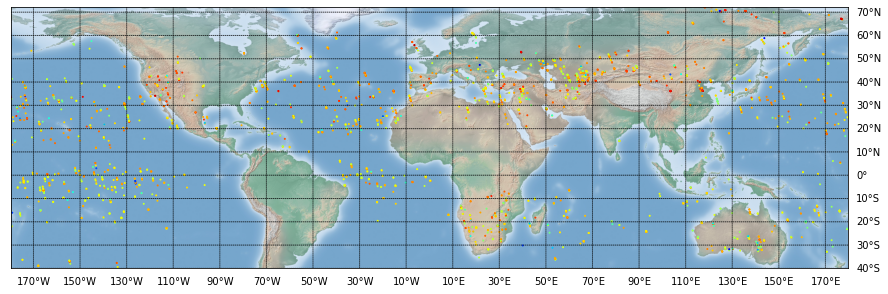

In [10]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
draw_map_df(df_res, c='delta', lon_min=min(df_res['longitude']), lon_max=max(df_res['longitude']), lat_min=min(df_res['latitude']), lat_max=max(df_res['latitude']))

In [11]:
#!conda install bokeh

## Conversion de coordonnées

On peut se référer aux projections à travers les codes « EPSG », qui sont des identificateurs de SIG nommés et gérés par l’European Petroleum Survey Group.
La projection Sphérique de Mercator est identifiée comme EPSG: 3857. Ces coordonnées sont en mètres et exprimées par x / y.

L’autre code EPSG commun est EPSG:4326, qui utilise le WGS84 comme système de coordonnées. Il décrit des coordonnées (latitude / longitude).

Les données OCO2 sont en EPSG:4326 alors que Bokeh attend des coordonnées EPSG:3857. Il faut donc faire une conversion.

In [12]:
import pyproj

gps_projection = pyproj.Proj("EPSG:4326")  # GPS
mercator_projection = pyproj.Proj("EPSG:3857")  # Mercator

df_res['x'], df_res['y'] = pyproj.transform(gps_projection, mercator_projection, df_res['latitude'].tolist(), df_res['longitude'].tolist())
df_res['size'] = df_res['delta']*4
df_res.head(3)

,Unnamed: 0,sounding_id,latitude,longitude,orbit,slope,intercept,amplitude,sigma,delta,R,windspeed_u,windspeed_v,x,y,size
0,0,2018080101035604,25.425072,-177.345490,21709,0.000430,404.902899,-14.694226,-3.987167,1.470254,0.677812,-7.759225,-0.739198,-1.974201e+07,2.928046e+06,5.881015
1,1,2018080101060803,32.777554,-179.428162,21709,0.002886,404.622407,1.493849,7.887665,0.075556,0.532213,-5.420354,-0.992332,-1.997385e+07,3.865815e+06,0.302224
2,2,2018080101062035,33.441360,-179.630508,21709,-0.002734,404.470875,18.128640,3.086571,2.343144,-0.656713,-4.649583,-0.913302,-1.999638e+07,3.954035e+06,9.372578


In [13]:
df_res.tail(3)

,Unnamed: 0,sounding_id,latitude,longitude,orbit,slope,intercept,amplitude,sigma,delta,R,windspeed_u,windspeed_v,x,y,size
2736,2736,2018083122432571,31.114796,-143.827850,22159,0.006210,403.550794,0.286084,14.724687,0.007751,0.542937,-4.404825,2.101457,-1.601084e+07,3.647667e+06,0.031004
2737,2737,2018083122433238,31.412222,-143.909012,22159,0.003365,403.564271,15.091141,22.844005,0.263548,0.506012,-4.287163,2.074741,-1.601988e+07,3.686401e+06,1.054192
2738,2738,2018083122433476,31.561739,-143.956909,22159,0.000956,403.523323,31.588597,29.640165,0.425167,0.520540,-4.228929,2.043472,-1.602521e+07,3.705919e+06,1.700669


In [14]:
# Crash notebook :-(
# import pandas_bokeh
# pandas_bokeh.output_notebook()
# df_res.plot_bokeh(simplify_shapes=10000)

In [15]:
df_res.columns

Index(['Unnamed: 0', 'sounding_id', 'latitude', 'longitude', 'orbit', 'slope',
       'intercept', 'amplitude', 'sigma', 'delta', 'R', 'windspeed_u',
       'windspeed_v', 'x', 'y', 'size'],
      dtype='object')

In [16]:
from bokeh.plotting import figure, output_file, show
#from bokeh.tile_providers import CARTODBPOSITRON, get_provider
from bokeh.tile_providers import CARTODBPOSITRON, get_provider
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models import GeoJSONDataSource
from bokeh.io import output_notebook
# from bokeh.events import ButtonClick
# from bokeh.models import Button, CustomJS
# button = Button()
# button.js_on_event(ButtonClick, CustomJS(code='console.log("JS:Click")'))

output_notebook()

source = ColumnDataSource(data=df_res)
output_file("peak_map.html")

tile_provider = get_provider(CARTODBPOSITRON)
hover = HoverTool(tooltips=[
    ("Orbit", "@orbit"),
    ("sounding_id", "@sounding_id"),
    ("delta", "@delta"),
    ("windspeed_u","@windspeed_u")
])

p = figure(x_range=(-3000000, 5000000), y_range=(-100000, 8000000), plot_width=1200, plot_height=800,
           x_axis_type="mercator", y_axis_type="mercator"
          ,tools=[hover, 'wheel_zoom','save','box_zoom','reset']
          )
p.add_tile(tile_provider)

p.circle(x='x', y='y', source=source,size='size',
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.01)

show(p)

Loading BokehJS ...

In [17]:
# ODIAC - https://colab.research.google.com/drive/1pERH_iSkIkMYy1MDe_MAWTUs2MoPRa7x#scrollTo=uR8cnThg-paEwc
# path6 = "/content/drive/My Drive/Data For Good/odiac2019_1x1d_2018.nc"
# http://datasets.wri.org/dataset/globalpowerplantdatabase%22

In [18]:
# from bokeh.plotting import figure, show
# from bokeh.io import output_notebook
# output_notebook()
# p = figure(plot_width=400, plot_height=400)
# p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)
# show(p)

## View one peak

In [44]:
import os
import glob
import numpy as np
import pandas as pd

# http://courty.fr/OCO2/peak_data-f_oco2_1808-o_21733-si_2018080216413233.json

def load_one_peak_data(sounding_id, df_all_peak):
#     json_list = glob.glob(input_dir + "peak_*-si_*"+sounding_id+"*.json")
#     if len(json_list) > 1:
#         print("E : more than one result !")
#         return False
#     if len(json_list) < 1:
#         print("ERROR : no result !")
#         return False
#     one_file = json_list[0]
    df_param = df_all_peak.query("sounding_id==@sounding_id")
    param_index = df_param.index[0]
    url = input_dir + "peak_data-f_oco2_1808-o_"+str(df_param.loc[param_index, 'orbit'])+"-si_"+sounding_id+".json"
    print(url)
    df_peak = pd.read_json(url)
    
    gaussian_param = {
        'slope' : df_param.loc[param_index, 'slope'],
        'intercept' : df_param.loc[param_index, 'intercept'],
        'amplitude' : df_param.loc[param_index, 'amplitude'],
        'sigma': df_param.loc[param_index, 'sigma'],
        'delta': df_param.loc[param_index, 'delta'],
        'R' : df_param.loc[param_index, 'R'],
    }
    return df_peak, gaussian_param

'''
x : the data input value
m : the slope of the data
b : the intercep of the data
A : Amplitude de la courbe
sig : sigma / écart type de la courbe
'''
def gaussian(x, m, b, A, sig):
    return m * x + b + A / (sig * (2 * np.pi)**0.5) * np.exp(-x**2 / (2*sig**2))

def plot_peak(df_peak, gaussian_param):
    x = df_peak['distance']
    y = df_peak['xco2']
    y = y - gaussian_param['slope'] * x - gaussian_param['intercept']
    plt.scatter(x, y, c=y, s=3, label='sounding')
    plt.plot(x, gaussian(x, m=0, b=0, A=gaussian_param['amplitude'], sig=gaussian_param['sigma']), 'r', label='fit')
    plt.legend()
    plt.title('OCO 2 data')
    plt.xlabel('Distance')
    plt.ylabel('CO²')
    plt.show()

http://courty.fr/OCO2/peak_data-f_oco2_1808-o_21733-si_2018080216413233.json
{'slope': 0.005723043408086421, 'intercept': 401.43495729769575, 'amplitude': 24.408283259582753, 'sigma': 16.896496551905276, 'delta': 0.5763026763772544, 'R': 0.5402939375778223}


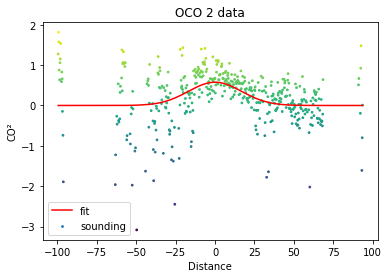

In [45]:
df_peak, gaussian_param = load_one_peak_data("2018080216413233", df_res)
#df_peak, gaussian_param = load_one_peak_data("2018082510150705", df_res)
print(gaussian_param)
# df_res.query("sounding_id==2018080404560303")
# #df_peak.query("distance>-0.1 and distance<0.1")
# df_peak.query("distance == 0.0")
plot_peak(df_peak, gaussian_param)
# Best m, b, A, sig =  [3.92560177e-03 4.00770662e+02 1.43374694e+02 1.42527377e+01]

../../../datasets/OCO2/csv/peak_data-f_oco2_1808-o_21979-si_2018081914055276.json


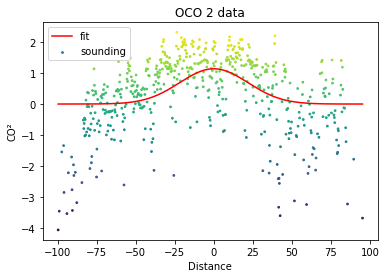

In [28]:
df_peak, gaussian_param = load_one_peak_data("2018081914055276", df_res)
plot_peak(df_peak, gaussian_param)

In [21]:
df_peak

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,distance,xco2_enhancement
0,2018082505140737,35.381119,117.617882,402.489136,0.538477,22061,-2.934589,-0.302513,-99.725378,1.187836
1,2018082505140705,35.382828,117.612930,402.296753,0.598167,22061,-2.931646,-0.300571,-99.437124,0.995453
2,2018082505140778,35.389442,117.617271,401.453735,0.627418,22061,-2.932914,-0.290414,-98.812587,0.152435
3,2018082505140736,35.391018,117.612320,401.566681,0.598855,22061,-2.929978,-0.288709,-98.538780,0.265381
4,2018082505140704,35.392429,117.607048,400.578400,0.737690,22061,-2.926889,-0.287296,-98.275990,-0.722900
...,...,...,...,...,...,...,...,...,...,...
555,2018082505143835,37.104229,117.033653,400.866943,0.761261,22061,-2.422778,1.725939,98.687847,-0.434357
556,2018082505143803,37.105537,117.027161,399.662659,0.649699,22061,-2.419173,1.727831,98.965282,-1.638641
557,2018082505143908,37.111031,117.039551,401.579468,0.700704,22061,-2.412048,1.738168,99.298584,0.278168
558,2018082505143876,37.112629,117.033546,401.482880,0.677866,22061,-2.408036,1.740626,99.597031,0.181580


In [22]:
from scipy.optimize import curve_fit
import numpy as np

def peak_detection(df_slice):
    default_return = {}
    orbit_index=0
    # Skip if too few data
    if len(df_slice)<400:
        #print('ERROR : Not enought data')
        return default_return
    med_temp = np.median(df_slice['xco2'])
    # std_temp = np.std(df_slice['xco2']) # Not used
    df_slice['xco2_enhancement'] = df_slice['xco2'] - med_temp
    # Base parameters for : m, b, A, sig
    p0 = (0.,med_temp,30*df_slice.loc[0,'xco2_enhancement'],10.) 
    #print('Estimated parameters:', p0)
    d_centered = df_slice
    '''
    Gaussian Fit
    scipy.optimize.curve_fit
    scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=default_return, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)[source]¶
    p0 = Initial guess for the parameters (length N).
    sigma : Determines the uncertainty in ydata.
    '''
    popt, _ = curve_fit(f=gaussian, xdata=d_centered, ydata=df_slice['xco2'], sigma = df_slice['xco2_uncert'], p0 = p0, maxfev=20000, ftol=0.5, xtol=0.5) # ftol=0.5, xtol=0.5 to speed up
    sig = abs(popt[3])  # sigma of the Gaussian (km)
    #print(sig)
    if sig < 2 : return default_return  # too narrow
    if 3*sig > window / 2.: return default_return  # too large
    delta = popt[2]/(popt[3]*(2 * np.pi)**0.5)  # height of the peak (ppm)
    if delta < 0: return default_return  # depletion
    #d_plume = df_slice[(d_centered >= -2*sig) & (d_centered <= 2*sig)]
    #d_backg = df_slice[(d_centered < -2*sig) | (d_centered > 2*sig)]

    # we want at least 1 1-km-sounding per km on average on both sides of the peak within 2 sigmas and between 2 and 3 sigmas
    if len(df_slice[(d_centered >= -1*sig) & (d_centered <= 0)]) < int(sig): return default_return
    if len(df_slice[(d_centered <= 1*sig) & (d_centered >= 0)]) < int(sig): return default_return
    if len(df_slice[(d_centered >= -3*sig) & (d_centered <= -2*sig)]) < int(sig): return default_return
    if len(df_slice[(d_centered <= 3*sig) & (d_centered >= 2*sig)]) < int(sig): return default_return
    # check the quality of the fit
    d_peak = df_slice[(d_centered >= -4*sig) & (d_centered <= 4*sig)]
    d_peak_distance = d_peak['distance'] - df_slice.loc[0, 'distance']
    R = np.corrcoef(gaussian(d_peak_distance,*popt), d_peak['xco2'])
    if R[0,1]**2 < 0.25 : return default_return
    #print('orbit_index',orbit_index, 'Number of good fit',good_find, 'Sigma:', sig, 'Ampleur de l\'émission de CO²:',delta,'Coef de coreflation',R[0,1])
    # TODO: Add filename of input to be able to load it later
    peak = {
        'sounding_id' : df_slice.loc[orbit_index, 'sounding_id'],
        'latitude' : df_slice.loc[orbit_index, 'latitude'],
        'longitude' : df_slice.loc[orbit_index, 'longitude'],
        'orbit' : orbit_number,
        'slope' : popt[0],
        'intercept' : popt[1],
        'amplitude' : popt[2],
        'sigma': popt[3],
        'delta': delta,
        'R' : R[0,1],
        'windspeed_u' : df_slice.loc[0, 'windspeed_u'],
        'windspeed_v' : df_slice.loc[orbit_index, 'windspeed_v']
    }
    return peak


In [23]:
peak_detection(df_peak)

/media/data-nvme/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


ValueError: Unable to coerce to Series, length must be 10: given 560

In [ ]:
df_peak['xco2']